<a href="https://colab.research.google.com/github/HiroshanI/Heart-Disease-Prediction-App/blob/model_comparison/Copy_of_heart_disease_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### üìÖ Import Tools and Data

In [ ]:
# Data exploration and manipulation
import pandas as pd
import numpy as np
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import plotly.graph_objects as go
# Data preparation
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from sklearn.svm import SVC
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Save/Load model
import pickle
# Extras
import warnings

In [ ]:
# Ignore warnings
warnings.filterwarnings("ignore")
# Constants
MY_PALETTE= ["#525FE1","#F55353", "#FEB139", "#8F43EE", "#00DFA2"]
# Plot style
plt.style.use('dark_background')
plt.rcParams['figure.facecolor'] = '#0d1117'
plt.rcParams['axes.facecolor'] = '#0d1117'
plt.rcParams["axes.linewidth"] = 0
plt.rcParams["patch.linewidth"] = 0
plt.rcParams["figure.edgecolor"] = 'white'
plt.rcParams["figure.titleweight"] = 'bold'
plt.rcParams["figure.titlesize"] = 20
plt.rcParams["axes.titleweight"] = 'normal'
plt.rcParams["axes.titlesize"] = 12
sns.set_palette(MY_PALETTE)

Read Dataset

In [ ]:
# Read dataset
data = pd.read_csv('input/heart_disease_uci.csv')
display(data.head().style.hide(axis='index'))
print(f"Dataset shape : {data.shape[0]} rows x {data.shape[1]} columns")

Dataset shape : 920 rows x 16 columns


Basic Clean-up

In [ ]:
def basic_clean_data(data):
    data.rename(mapper={'num':'class'}, axis=1, inplace=True) # rename target column to "class"
    data.dropna(subset=['class'], axis=0, inplace=True) # drop rows if target is null
    data.drop_duplicates(keep='first', inplace=True) # drop duplicate rows
    #rename attributes that has space with _
    data["restecg"].replace({"lv hypertrophy": "lv_hypertrophy","st-t abnormality": "stt_abnormality" }, inplace=True)
    data['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
    data['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)
    return data
data = basic_clean_data(data)
display(data.head().style.hide(axis='index'))
print(f"Dataset shape : {data.shape[0]} rows x {data.shape[1]} columns")

Dataset shape : 920 rows x 16 columns


### üìä Exploratory Data Analysis

Distribution of Data (Univariate Analysis)

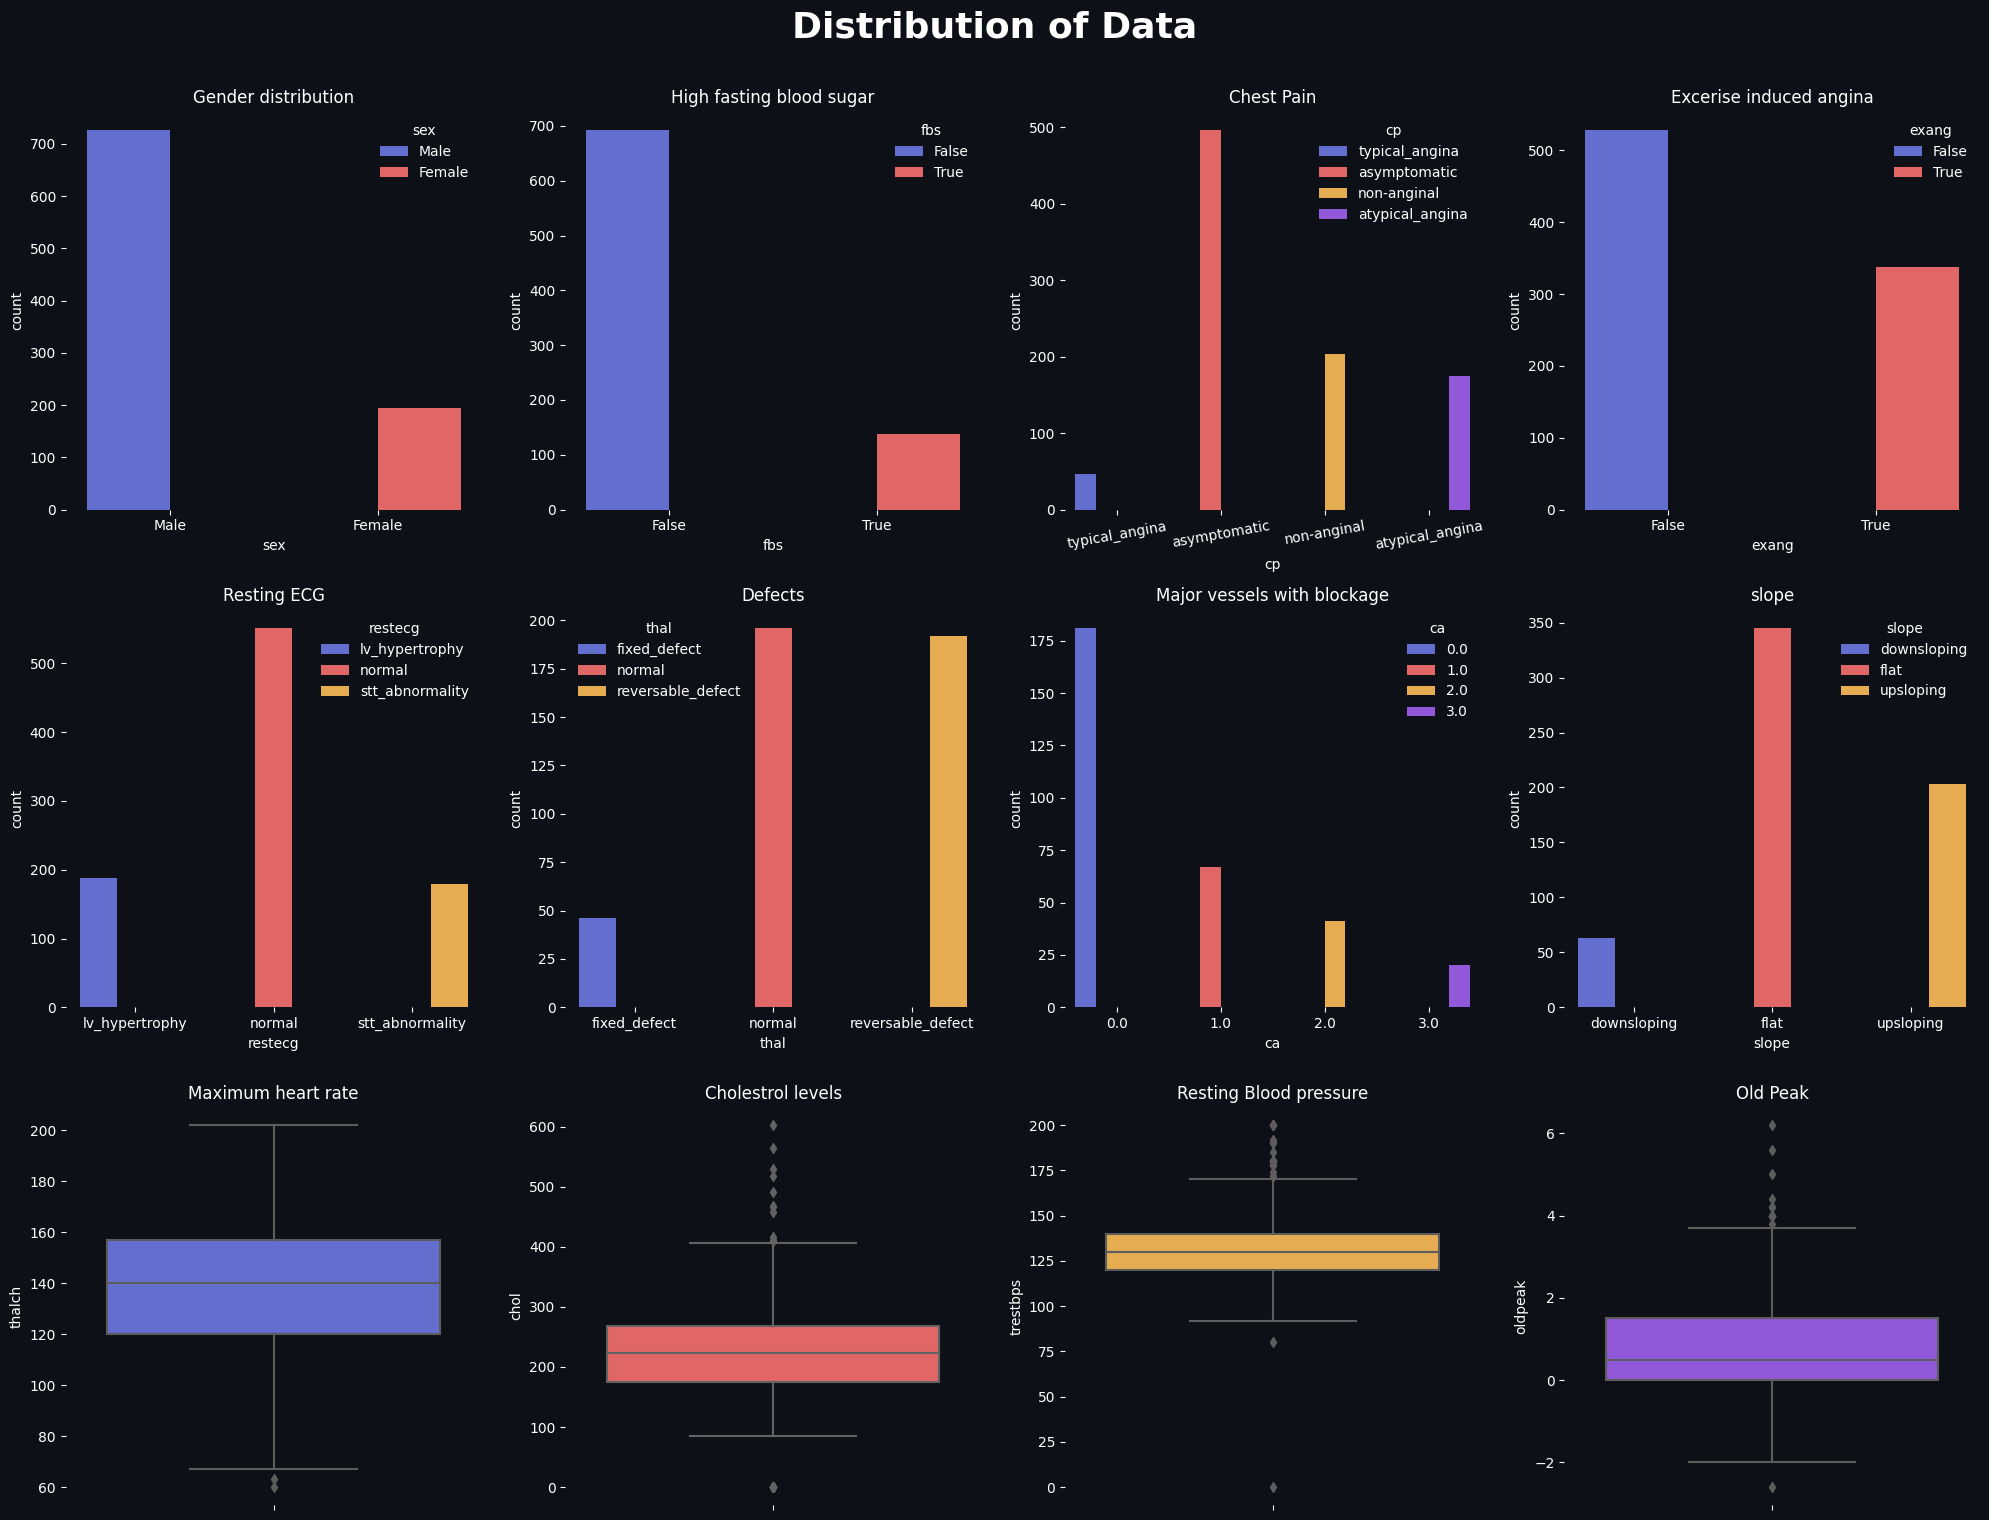

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,15))
fig.subplots_adjust(hspace=0.4)
fig.suptitle("Distribution of Data", fontsize=26, y=1.01)
sns.set_palette(MY_PALETTE)
# Categorical Features
sns.countplot(data=data, x='sex', ax=axes[0,0], hue='sex')
axes[0,0].set_title("Gender distribution")
sns.countplot(data=data, x='fbs', ax=axes[0,1], hue='fbs')
axes[0,1].set_title("High fasting blood sugar")
sns.countplot(data=data, x='cp', ax=axes[0,2], hue='cp')
axes[0,2].set_title("Chest Pain")
sns.countplot(data=data, x='exang', ax=axes[0,3], hue='exang')
axes[0,3].set_title("Excerise induced angina")
axes[0,2].set_xticklabels(data['cp'].unique(), rotation=10)
sns.countplot(data=data, x='restecg', ax=axes[1,0], hue='restecg')
axes[1,0].set_title("Resting ECG")
sns.countplot(data=data, x='thal', ax=axes[1,1], hue='thal')
axes[1,1].set_title("Defects")
sns.countplot(data=data, x='ca', ax=axes[1,2], hue='ca', palette=MY_PALETTE)
axes[1,2].set_title("Major vessels with blockage")
sns.countplot(data=data, x='slope', ax=axes[1,3], hue='slope')
axes[1,3].set_title("slope")
# Numerical Features
sns.boxplot(data=data, y='thalch', ax=axes[2,0], color=MY_PALETTE[0])
axes[2,0].set_title("Maximum heart rate")
sns.boxplot(data=data, y='chol', ax=axes[2,1], color=MY_PALETTE[1])
axes[2,1].set_title("Cholestrol levels")
sns.boxplot(data=data, y='trestbps', ax=axes[2,2], color=MY_PALETTE[2])
axes[2,2].set_title("Resting Blood pressure")
sns.boxplot(data=data, y='oldpeak', ax=axes[2,3], color=MY_PALETTE[3])
axes[2,3].set_title("Old Peak")
plt.tight_layout()
plt.show()

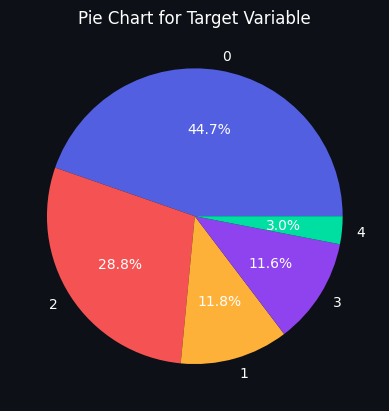

In [ ]:
# Analyzing the Target Feature and renaming it to suitable name
unique_values = data['class'].unique()

# Get the count of each unique value
counts = data['class'].value_counts()

# Calculate the percentage of each value
percentages = counts / counts.sum() * 100

# Create a pie chart
plt.pie(percentages, labels=unique_values, autopct='%1.1f%%')
plt.title('Pie Chart for Target Variable')
plt.show()

Bivariate Analysis

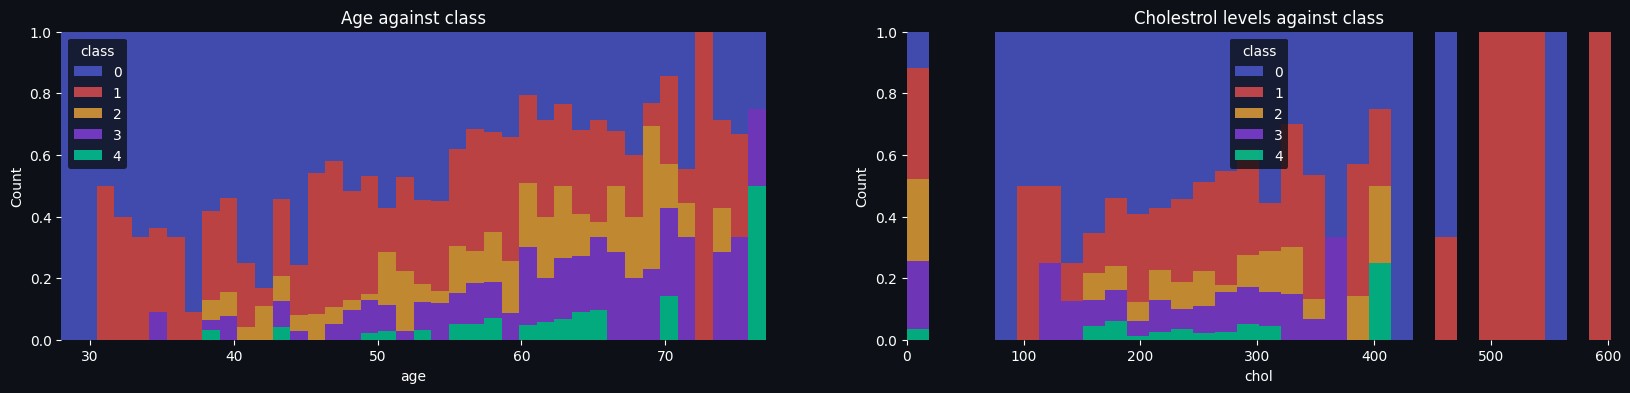

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,4))
#Age vs class
sns.histplot(data=data, x='age', hue='class',multiple="fill", bins=40, palette=MY_PALETTE, ax=axes[0])
axes[0].set_title("Age against class")
#Cholestrol levels vs class
sns.histplot(data=data, x='chol', hue='class',multiple="fill", palette=MY_PALETTE, ax=axes[1])
axes[1].set_title("Cholestrol levels against class")
plt.show()

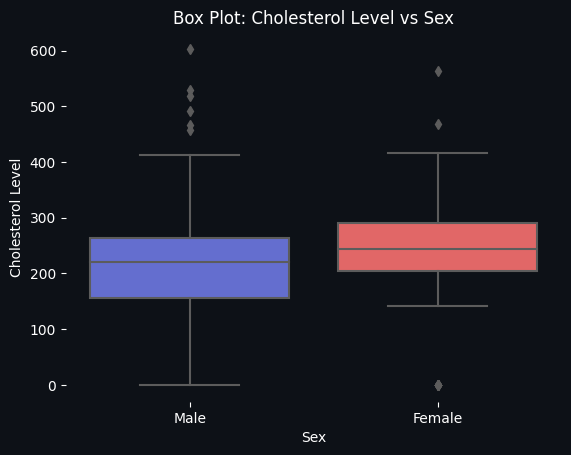

In [ ]:
#Box Plot for Cholestrol level vs Sex
sns.boxplot(x='sex', y='chol', data=data)
plt.title('Box Plot: Cholesterol Level vs Sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol Level')
plt.show()

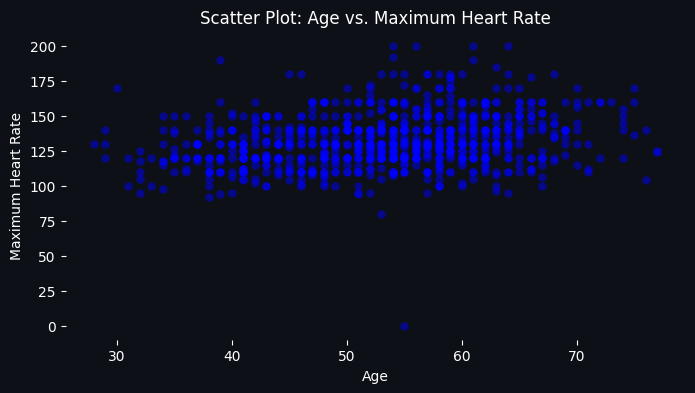

In [ ]:
#Scatter Plot for Age vs. Maximum Heart Rate
plt.figure(figsize=(8, 4))
plt.scatter(data['age'], data['trestbps'], color='blue', alpha=0.5)
plt.title('Scatter Plot: Age vs. Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

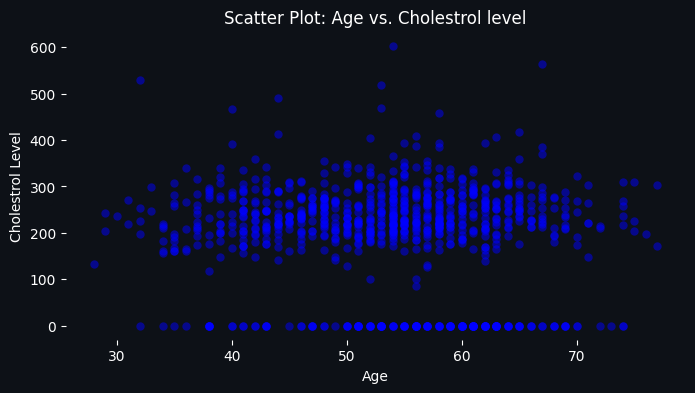

In [ ]:
#Scatter Plot for Age vs. Cholestrol Level

plt.figure(figsize=(8, 4))
plt.scatter(data['age'], data['chol'], color='blue', alpha=0.5)
plt.title('Scatter Plot: Age vs. Cholestrol level')
plt.xlabel('Age')
plt.ylabel('Cholestrol Level')
plt.show()

### üîç Missing values

How much is missing?

In [ ]:
# Checking for null values

data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
class         0
dtype: int64

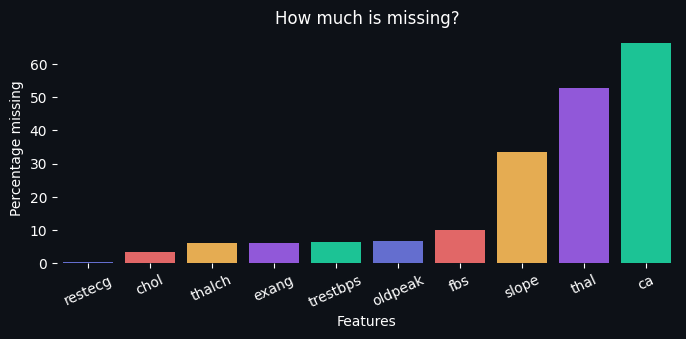

In [ ]:
# Missing column names
missing_val_cols = data.columns[data.isnull().any()]
# No. of missing values for each column
missing_vals = data[missing_val_cols].isnull().sum().sort_values()

plt.figure(figsize=(8,3))
sns.barplot(x=missing_vals.index, y=round(missing_vals/data.shape[0] * 100, 1), palette=MY_PALETTE)
plt.xticks(rotation=25)
plt.title("How much is missing?")
plt.xlabel("Features")
plt.ylabel("Percentage missing")
plt.show()

- `age` column does not have missing values
- More than half of `ca`, `slope`, `thal` values are missing
- Other features are missing less than 10% values

In [ ]:
#Records with null values
records_with_null = data[data.isnull().any(axis=1)]
records_with_null

id  age     sex        dataset               cp  trestbps   chol    fbs  \
87    88   53  Female      Cleveland      non-anginal     128.0  216.0  False   
166  167   52    Male      Cleveland      non-anginal     138.0  223.0  False   
192  193   43    Male      Cleveland     asymptomatic     132.0  247.0   True   
266  267   52    Male      Cleveland     asymptomatic     128.0  204.0   True   
287  288   58    Male      Cleveland  atypical_angina     125.0  220.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical_angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical_angina     120.0  254.0  False   

             restecg  thalch  exang  oldpeak      slope   ca  \
87    lv_hypertrophy   115.0  False      0.0  upsloping  0.0   
166           normal   169.0  False      0.0  upsloping  NaN   
192   lv_hypertrophy   143.0   True      0.1       flat  NaN   
266           normal   156.0   True      1.0       flat  0.0   
287           normal   144.0  False      0.4       flat  NaN   
..               ...     ...    ...      ...        ...  ...   
915  stt_abnormality   154.0  False      0.0        NaN  NaN   
916  stt_abnormality     NaN    NaN      NaN        NaN  NaN   
917  stt_abnormality   100.0  False      0.0        NaN  NaN   
918   lv_hypertrophy     NaN    NaN      NaN        NaN  NaN   
919   lv_hypertrophy    93.0   True      0.0        NaN  NaN   

                  thal  class  
87                 NaN      0  
166             normal      0  
192  reversable_defect      1  
266                NaN      2  
287  reversable_defect      0  
..                 ...    ...  
915                NaN      1  
916                NaN      0  
917       fixed_defect      2  
918                NaN      0  
919                NaN      1  

[621 rows x 16 columns]

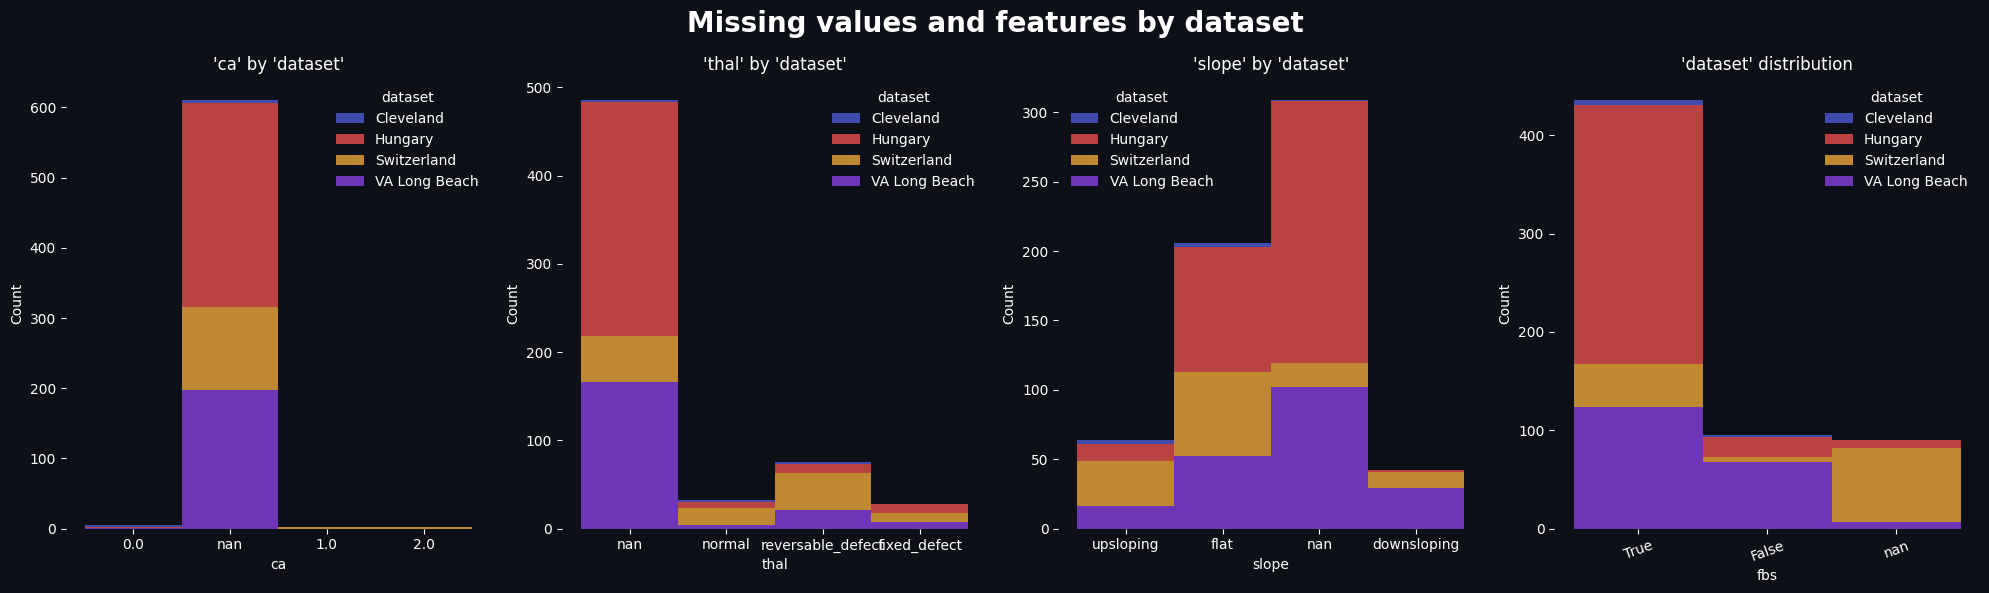

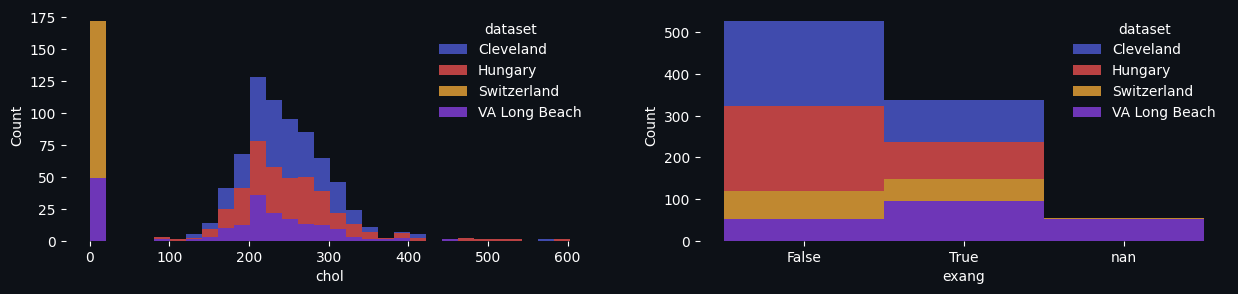

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,6))
fig.subplots_adjust(hspace=0.3)
fig.suptitle("Missing values and features by dataset")
sns.set_palette(MY_PALETTE)
sns.histplot(data=records_with_null, x=records_with_null['ca'].sort_values().astype('str'), hue='dataset', multiple='stack', ax=axes[0])
sns.histplot(data=records_with_null, x=records_with_null['thal'].sort_values().astype('str'), hue='dataset', multiple='stack', ax=axes[1])
sns.histplot(data=records_with_null, x=records_with_null['slope'].sort_values().astype('str'), hue='dataset', multiple='stack', ax=axes[2])
sns.histplot(data=records_with_null, x=records_with_null['fbs'].sort_values().astype('str'), hue='dataset', multiple='stack', ax=axes[3])
axes[0].set_title("'ca' by 'dataset'")
axes[1].set_title("'thal' by 'dataset'")
axes[2].set_title("'slope' by 'dataset'")
axes[3].set_title("'dataset' distribution")
axes[3].set_xticklabels(data['fbs'].unique(), rotation=20)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15,3))
sns.histplot(data=data, x='chol', bins=30, hue='dataset', multiple='stack', ax=axes[0])
sns.histplot(data=data, x=data['exang'].astype(str), hue='dataset', multiple='stack', ax=axes[1])
plt.show()

- `ca`,`thal`,`slope` and `fbs` doesn't have missing values from the `Cleveland` dataset

In [ ]:
#Dataset(location) Contributions for null records
df=records_with_null['dataset'].value_counts().reset_index().rename(columns={'index':'dataset','dataset':'count'})
fig = go.Figure([go.Pie(labels=df['dataset'],values=df['count'], hole = 0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig.update_layout(title="Dataset Contributions for null records",title_x=0.5)
fig.show()

*   `Cleveland` dataset has the least impact on missing records
*   Therefore only data from `Cleveland` dataset will be selected

In [ ]:
X = data[data['dataset'] == "Cleveland"]
X.drop(['dataset'], axis=1, inplace=True)
display(X.head().style.hide(axis='index'))
print(f"Dataset shape : {X.shape[0]} rows x {X.shape[1]} columns")

Dataset shape : 304 rows x 15 columns


### üìä Exploratory Data Analysis

In [ ]:
temp = X.copy()
temp['Heart Disease'] = [y != 0 for y in temp['class']]

In [ ]:
# sns.histplot(data=temp, x='age', hue='sex', multiple='dodge', kde=True)
# sns.histplot(data=temp, x='chol', hue='sex', multiple='dodge', kde=True)

# sns.histplot(data=temp, x='age', hue='Heart Disease', multiple='stack', palette=MY_PALETTE, kde=True)
# sns.histplot(data=temp, x='chol', hue='Heart Disease', multiple='stack', palette=MY_PALETTE, kde=True)
# sns.histplot(data=temp, x='trestbps', hue='Heart Disease', multiple='stack', palette=MY_PALETTE, kde=True)
# sns.histplot(data=temp, x='chol', hue='Heart Disease', multiple='stack', palette=MY_PALETTE, kde=True)

# sns.lmplot(data=temp, x='age', y='chol_', hue='Heart Disease')
# from scipy.stats.mstats import winsorize
# temp['chol_'] = winsorize(temp['chol'], limits=[0, 0.01])
# sns.boxplot(data=temp, y="chol_", hue="Heart Disease")

df = temp.groupby('Heart Disease')[['sex','thal','exang','restecg','fbs','cp']].value_counts().reset_index()
df[0]

# plt.pie(temp['Heart Disease'].value_counts())

0      15
1      11
2      11
3      10
4       9
       ..
100     1
101     1
102     1
103     1
104     1
Name: 0, Length: 105, dtype: int64

### ü™ì Split Data

- No testing set so split the dataset into training and testing
- Doing this early before manipulation to prevent data leakage
- Splitting ratio ‚û°Ô∏è 80 : 20


In [ ]:
# Constants
RANDOM_STATE=42
NUM_COLS = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
CAT_COLS = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [ ]:
# Separate data into target and features
y = X['class']
X = X.drop('class', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=RANDOM_STATE)

print(tabulate(zip(['Training set', 'Testing set'],[X_train.shape, X_valid.shape]),
               headers=['Data', '(Rows, Columns)']))

Data          (Rows, Columns)
------------  -----------------
Training set  (243, 14)
Testing set   (61, 14)


In [ ]:
#Training data
X_train

id  age     sex               cp  trestbps   chol    fbs  \
269  270   42    Male      non-anginal     130.0  180.0  False   
211  212   38    Male   typical_angina     120.0  231.0  False   
197  198   45  Female     asymptomatic     138.0  236.0  False   
75    76   65  Female      non-anginal     160.0  360.0  False   
177  178   56    Male     asymptomatic     132.0  184.0  False   
..   ...  ...     ...              ...       ...    ...    ...   
188  189   54    Male  atypical_angina     192.0  283.0  False   
71    72   67    Male     asymptomatic     125.0  254.0   True   
106  107   59    Male     asymptomatic     140.0  177.0  False   
270  271   61    Male     asymptomatic     140.0  207.0  False   
102  103   57  Female     asymptomatic     128.0  303.0  False   

            restecg  thalch  exang  oldpeak      slope   ca               thal  
269          normal   150.0  False      0.0  upsloping  0.0             normal  
211          normal   182.0   True      3.8       flat  0.0  reversable_defect  
197  lv_hypertrophy   152.0   True      0.2       flat  0.0             normal  
75   lv_hypertrophy   151.0  False      0.8  upsloping  0.0             normal  
177  lv_hypertrophy   105.0   True      2.1       flat  1.0       fixed_defect  
..              ...     ...    ...      ...        ...  ...                ...  
188  lv_hypertrophy   195.0  False      0.0  upsloping  1.0  reversable_defect  
71           normal   163.0  False      0.2       flat  2.0  reversable_defect  
106          normal   162.0   True      0.0  upsloping  1.0  reversable_defect  
270  lv_hypertrophy   138.0   True      1.9  upsloping  1.0  reversable_defect  
102  lv_hypertrophy   159.0  False      0.0  upsloping  1.0             normal  

[243 rows x 14 columns]

In [ ]:
#Testing data
X_valid

id  age     sex               cp  trestbps   chol    fbs  \
180  181   48    Male     asymptomatic     124.0  274.0  False   
154  155   64    Male     asymptomatic     120.0  246.0  False   
111  112   56    Male     asymptomatic     125.0  249.0   True   
247  248   47    Male     asymptomatic     110.0  275.0  False   
60    61   51  Female     asymptomatic     130.0  305.0  False   
..   ...  ...     ...              ...       ...    ...    ...   
218  219   64  Female     asymptomatic     130.0  303.0  False   
104  105   49    Male      non-anginal     120.0  188.0  False   
301  302   57  Female  atypical_angina     130.0  236.0  False   
194  195   68  Female      non-anginal     120.0  211.0  False   
185  186   63  Female  atypical_angina     140.0  195.0  False   

            restecg  thalch  exang  oldpeak        slope   ca  \
180  lv_hypertrophy   166.0  False      0.5         flat  0.0   
154  lv_hypertrophy    96.0   True      2.2  downsloping  1.0   
111  lv_hypertrophy   144.0   True      1.2         flat  1.0   
247  lv_hypertrophy   118.0   True      1.0         flat  1.0   
60           normal   142.0   True      1.2         flat  0.0   
..              ...     ...    ...      ...          ...  ...   
218          normal   122.0  False      2.0         flat  2.0   
104          normal   139.0  False      2.0         flat  3.0   
301  lv_hypertrophy   174.0  False      0.0         flat  1.0   
194  lv_hypertrophy   115.0  False      1.5         flat  0.0   
185          normal   179.0  False      0.0    upsloping  2.0   

                  thal  
180  reversable_defect  
154             normal  
111             normal  
247             normal  
60   reversable_defect  
..                 ...  
218             normal  
104  reversable_defect  
301             normal  
194             normal  
185             normal  

[61 rows x 14 columns]

### ü•£ Prepare Data

Fill missing numerical values with median

In [ ]:
imputer = SimpleImputer(strategy="median")
X_train_num = pd.DataFrame(imputer.fit_transform(X_train[NUM_COLS]))
X_valid_num = pd.DataFrame(imputer.transform(X_valid[NUM_COLS]))
X_train_num.head(2)

0      1      2      3    4
0  42.0  130.0  180.0  150.0  0.0
1  38.0  120.0  231.0  182.0  3.8

Standardize numerical values

In [ ]:
num_scaler = RobustScaler()
num_scaler.fit(X_train_num)
X_train_num = pd.DataFrame(num_scaler.transform(X_train_num))
X_valid_num = pd.DataFrame(num_scaler.transform(X_valid_num))
X_valid_num.columns, X_train_num.columns = NUM_COLS, NUM_COLS # restore column names
X_train_num.head(2)

age  trestbps      chol    thalch  oldpeak
0 -0.928571   0.00000 -0.984127 -0.057971   -0.500
1 -1.214286  -0.47619 -0.174603  0.869565    1.875

Fill missing categorical values with mode

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")
X_train_cat = pd.DataFrame(imputer.fit_transform(X_train[CAT_COLS]))
X_valid_cat = pd.DataFrame(imputer.transform(X_valid[CAT_COLS]))
X_train_cat.columns, X_valid_cat.columns = CAT_COLS, CAT_COLS # restore column names
X_train_cat.head(2)

sex              cp    fbs restecg  exang      slope   ca  \
0  Male     non-anginal  False  normal  False  upsloping  0.0   
1  Male  typical_angina  False  normal   True       flat  0.0   

                thal  
0             normal  
1  reversable_defect

Encode categorical features

In [ ]:
#Categorical data in training dataset after preprocessing
display(X_train_cat.head().style.hide(axis='index'))
print("Number of records with null values: ",X_train_cat.isnull().any(axis=1).sum())

Number of records with null values:  0


In [ ]:
#Categorical data in testing dataset after preprocessing
display(X_valid_cat.head().style.hide(axis='index'))
print("Number of records with null values: ",X_valid_cat.isnull().any(axis=1).sum())

Number of records with null values:  0


In [ ]:
#One hot encoding for nominal features
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_ohenc = pd.DataFrame(oh_encoder.fit_transform(X_train_cat))
X_valid_cat_ohenc = pd.DataFrame(oh_encoder.transform(X_valid_cat))
X_train_cat_ohenc.head()

0    1    2    3    4    5    6    7    8    9   ...   13   14   15   16  \
0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  0.0  1.0  1.0   
1  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  ...  0.0  1.0  0.0  1.0   
2  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  1.0  0.0  1.0   
3  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  1.0   
4  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  1.0  0.0  0.0   

    17   18   19   20   21   22  
0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  1.0  
2  0.0  0.0  0.0  0.0  1.0  0.0  
3  0.0  0.0  0.0  0.0  1.0  0.0  
4  1.0  0.0  0.0  1.0  0.0  0.0  

[5 rows x 23 columns]

In [ ]:
#Ordinal encoding for ordinal features
or_encoder = OrdinalEncoder()
X_train_cat_orenc = pd.DataFrame(or_encoder.fit_transform(X_train_cat))
X_valid_cat_orenc = pd.DataFrame(or_encoder.transform(X_valid_cat))
X_train_cat_orenc.head()

0    1    2    3    4    5    6    7
0  1.0  2.0  0.0  1.0  0.0  2.0  0.0  1.0
1  1.0  3.0  0.0  1.0  1.0  1.0  0.0  2.0
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0
3  0.0  2.0  0.0  0.0  0.0  2.0  0.0  1.0
4  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0

Combine numerical and categorical data

In [ ]:
# Concatenate column-wise
X_train_final = pd.concat([X_train_num, X_train_cat_ohenc], axis=1)
X_valid_final = pd.concat([X_valid_num, X_valid_cat_ohenc], axis=1)
# Change column name type to string
X_train_final.columns, X_valid_final.columns = X_train_final.columns.astype(str),  X_valid_final.columns.astype(str)
print(f"Training set shape : {X_train_final.shape}")
print(f"Testing set shape : {X_valid_final.shape}")

Training set shape : (243, 28)
Testing set shape : (61, 28)


Original VS. Preprocessed Data

In [ ]:
print(f"Original ‚û°Ô∏è {X_train.shape}")
display(X_train.head(2))
print(f"Preprocessed ‚û°Ô∏è {X_train_final.shape}")
display(X_train_final.head(2))

Original ‚û°Ô∏è (243, 14)


id  age   sex              cp  trestbps   chol    fbs restecg  thalch  \
269  270   42  Male     non-anginal     130.0  180.0  False  normal   150.0   
211  212   38  Male  typical_angina     120.0  231.0  False  normal   182.0   

     exang  oldpeak      slope   ca               thal  
269  False      0.0  upsloping  0.0             normal  
211   True      3.8       flat  0.0  reversable_defect

Preprocessed ‚û°Ô∏è (243, 28)


age  trestbps      chol    thalch  oldpeak    0    1    2    3    4  \
0 -0.928571   0.00000 -0.984127 -0.057971   -0.500  0.0  1.0  0.0  0.0  1.0   
1 -1.214286  -0.47619 -0.174603  0.869565    1.875  0.0  1.0  0.0  0.0  0.0   

   ...   13   14   15   16   17   18   19   20   21   22  
0  ...  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
1  ...  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  

[2 rows x 28 columns]

Change target to Binary

In [ ]:
y_train_binary = pd.Series([int(y != 0) for y in y_train], name="Heart Disease")
y_valid_binary = pd.Series([int(y != 0) for y in y_valid], name="Heart Disease")
y_train_binary


0      0
1      1
2      0
3      0
4      1
      ..
238    1
239    1
240    1
241    1
242    0
Name: Heart Disease, Length: 243, dtype: int64

### üë∑‚Äç‚ôÇÔ∏è Model Development

**Random Forest Classifier**

In [ ]:
#Training the Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rfc_model.fit(X_train_final, y_train_binary);

In [ ]:
#Evaluating the Random Forest Classifier (RFC) model on both the training and validation datasets

#For the training data
rfc_train_preds = rfc_model.predict(X_train_final)

#For the testing data
rfc_test_preds = rfc_model.predict(X_valid_final)

#Print classification report for the model's predictions on the validation dataset
print(classification_report(y_valid_binary, rfc_test_preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.89      0.83      0.86        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



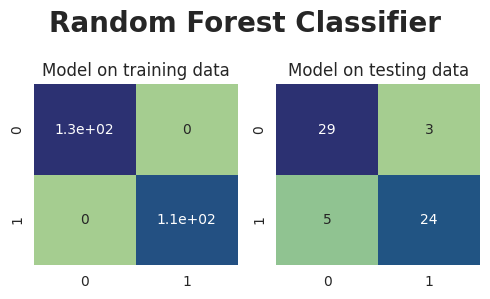

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(5,3))
fig.suptitle("Random Forest Classifier")
#Confusion matrix for the training data
axes[0].set_title("Model on training data")
sns.heatmap(confusion_matrix(y_train_binary, rfc_train_preds),  annot=True, cmap='crest', cbar=False, ax=axes[0])
#Confusion matrix for the testing data
axes[1].set_title("Model on testing data")
sns.heatmap(confusion_matrix(y_valid_binary, rfc_test_preds),  annot=True, cmap='crest', cbar=False, ax=axes[1])
plt.tight_layout()
plt.show()

In [ ]:
#Calculating the accuracy scores
acc_scores = []
ac = accuracy_score(y_valid_binary, rfc_test_preds)
acc_scores.append(ac)
print(ac)

0.8688524590163934


**Logistic Regression**

In [ ]:
#Training the Logistic Regression Model
log_model = LogisticRegression(random_state=RANDOM_STATE)
log_model.fit(X_train_final, y_train_binary);

In [ ]:
#Evaluating the Logistic Regression model on both the training and validation datasets

#For the training data
lr_train_preds = log_model.predict(X_train_final)

#For the testing data
lr_test_preds = log_model.predict(X_valid_final)

#Print classification report for the model's predictions on the validation dataset
print(classification_report(y_valid_binary, lr_test_preds))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.83      0.83      0.83        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



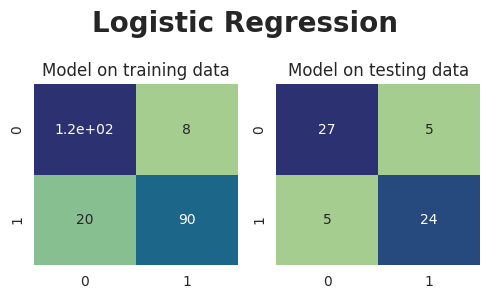

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(5,3))
fig.suptitle("Logistic Regression")
#Confusion matrix for the training data
axes[0].set_title("Model on training data")
sns.heatmap(confusion_matrix(y_train_binary, lr_train_preds), annot=True, cmap='crest', cbar=False, ax=axes[0])
#Confusion matrix for the testing data
axes[1].set_title("Model on testing data")
sns.heatmap(confusion_matrix(y_valid_binary, lr_test_preds), annot=True, cmap='crest', cbar=False, ax=axes[1])
plt.tight_layout()
plt.show()

In [ ]:
#Calculating the accuracy scores
ac = accuracy_score(y_valid_binary, lr_test_preds)
acc_scores.append(ac)
print(ac)

0.8360655737704918


**ANN model**

In [ ]:
#Training the ANN Model
ann_model = keras.Sequential([
    keras.layers.Dense(28, input_shape=(28,), activation='relu'),
    keras.layers.Dense(26, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = ann_model.fit(X_train_final, y_train_binary,
                        validation_data=(X_valid_final, y_valid_binary),
                        epochs=200, verbose=False);

In [ ]:
#Evaluating the ANN model on both the training and validation datasets

#For the training data
ann_train_preds = ann_model.predict(X_train_final, verbose=False)

#For the testing data
ann_test_preds = ann_model.predict(X_valid_final, verbose=False)

#Convert continuous predictions to binary predictions
ann_test_preds_binary = (ann_test_preds >= 0.5).astype(int)
ann_train_preds_binary = (ann_train_preds >= 0.5).astype(int)

print(classification_report(y_valid_binary, [int(y>0.5) for y in ann_test_preds]))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.77      0.83      0.80        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



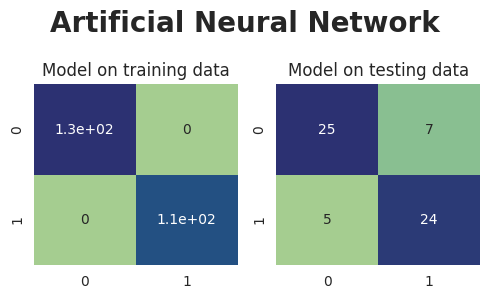

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(5, 3))
fig.suptitle("Artificial Neural Network")
#Confusion matrix for the training data
axes[0].set_title("Model on training data")
sns.heatmap(confusion_matrix(y_train_binary, ann_train_preds_binary), annot=True, cmap='crest', cbar=False, ax=axes[0])
#Confusion matrix for the testing data
axes[1].set_title("Model on testing data")
sns.heatmap(confusion_matrix(y_valid_binary, ann_test_preds_binary), annot=True, cmap='crest', cbar=False, ax=axes[1])
plt.tight_layout()
plt.show()

In [ ]:
#Calculating the accuracy scores
ac = accuracy_score(y_valid_binary, [int(y>0.5) for y in ann_test_preds])
acc_scores.append(ac)
print(ac)

0.8032786885245902


**SVC model**

In [ ]:
#Training the SVC Model
svc_model = SVC(kernel='linear', C=0.01, probability=True)
svc_model.fit(X_train_final, y_train_binary);

In [ ]:
#Evaluating the SVC model on both the training and validation datasets

#For the training data
svc_train_preds = svc_model.predict(X_train_final)

#For the testing data
svc_test_preds = svc_model.predict(X_valid_final)
print(classification_report(y_valid_binary, svc_test_preds))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.86      0.86      0.86        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



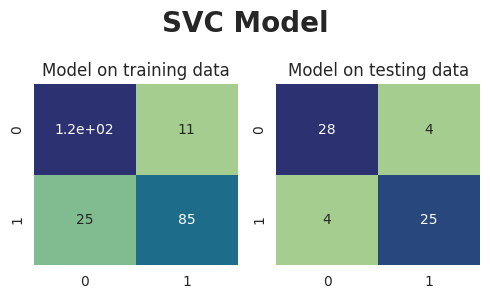

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(5,3))
fig.suptitle("SVC Model")
#Confusion matrix for the training data
axes[0].set_title("Model on training data")
sns.heatmap(confusion_matrix(y_train_binary, svc_train_preds), annot=True, cmap='crest', cbar=False, ax=axes[0])
#Confusion matrix for the testing data
axes[1].set_title("Model on testing data")
sns.heatmap(confusion_matrix(y_valid_binary, svc_test_preds), annot=True, cmap='crest', cbar=False, ax=axes[1])
plt.tight_layout()
plt.show()

In [ ]:
#Calculating the accuracy scores
ac = accuracy_score(y_valid_binary, svc_test_preds)
acc_scores.append(ac)
print(ac)

0.8688524590163934


Model Comparison

In [ ]:
model_list = ["Random Forest Classification","Logistic Regression","ANN","SVC"]

In [ ]:
acc_scores

[0.8688524590163934,
 0.8360655737704918,
 0.8032786885245902,
 0.8688524590163934]

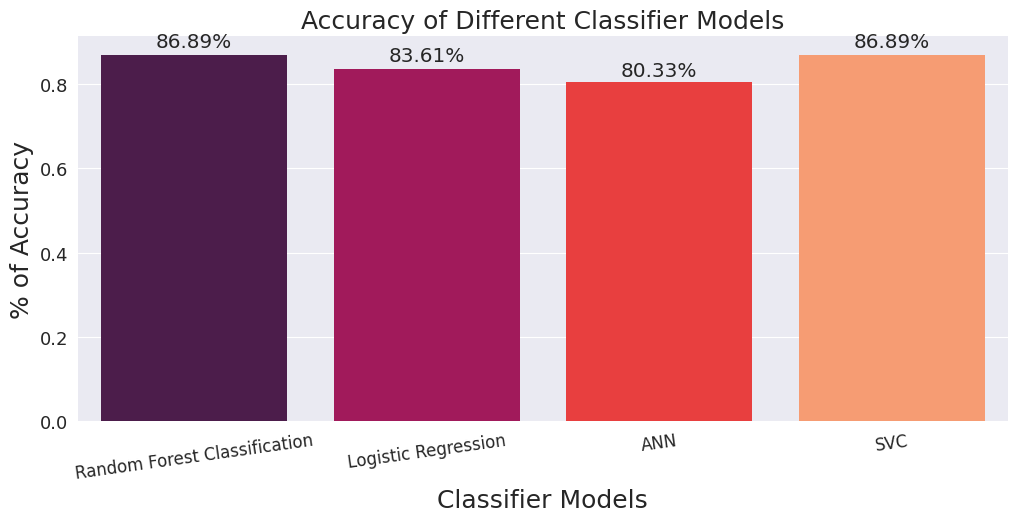

In [ ]:
plt.rcParams['figure.figsize']=12,5
sns.set_style("darkgrid")
ax = sns.barplot(x=model_list, y=acc_scores, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 18 )
plt.ylabel("% of Accuracy", fontsize = 18)
plt.title("Accuracy of Different Classifier Models", fontsize = 18)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

*   Random Forest Classifier and SVC models give the highest accuracy




### üíù Save Model

In [ ]:
filename = "heart_model_data.pkl"
path = "output/"
model_data = {
    'rfc_model': rfc_model,
    'log_model': log_model,
    'ann_model': ann_model,
    'svc_model': svc_model,
    'or_encoder': or_encoder,
    'encoder': oh_encoder,
    'scaler': num_scaler
    }
pickle.dump(model_data, open(path + filename, 'wb'))

In [ ]:
display(X_valid.head(5))
y_valid_binary.head(5)

id  age     sex            cp  trestbps   chol    fbs         restecg  \
180  181   48    Male  asymptomatic     124.0  274.0  False  lv hypertrophy   
154  155   64    Male  asymptomatic     120.0  246.0  False  lv hypertrophy   
111  112   56    Male  asymptomatic     125.0  249.0   True  lv hypertrophy   
247  248   47    Male  asymptomatic     110.0  275.0  False  lv hypertrophy   
60    61   51  Female  asymptomatic     130.0  305.0  False          normal   

     thalch  exang  oldpeak        slope   ca               thal  
180   166.0  False      0.5         flat  0.0  reversable defect  
154    96.0   True      2.2  downsloping  1.0             normal  
111   144.0   True      1.2         flat  1.0             normal  
247   118.0   True      1.0         flat  1.0             normal  
60    142.0   True      1.2         flat  0.0  reversable defect

0    1
1    1
2    1
3    1
4    1
Name: Heart Disease, dtype: int64